Load data

Explanation of goal?

In [126]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Locate files for SETAC figures - for Gammarus

- C = Cuivre / Copper / Cu
- Z = Zinc / Zn
- M = Methomyl

In [127]:
#locate files
dataset = r'D:\VP\ARTICLE2\SETAC\Gammarus'
IGTfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]
meanfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]

IGTfiles

['D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG10.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG11.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG12.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG13.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG14.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG4.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG5.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG6.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG7.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG8.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_IGTG9.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\

Repeat for three species

In [128]:
specie = {'E':'Erpobdella','G':'Gammarus','R':'Radix'}
etudes = {
    'C':{70:0,107:1,109:2,111:3,112:4,118:5,123:6,127:7,132:8,133:9,142:10,143:11,158:12,168:13,176:14},
    'M':{165:0,166:1,209:2,210:3},
    'Z':{121:0,122:1,125:2,130:3,131:4,155:5,159:6}
}

IGTs,means = {},{}

for s in [*specie]:
    dataset = r'D:\VP\ARTICLE2\SETAC\{}'.format(specie[s])
    IGTs.update({s:[r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]})
    means.update({s:[r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]})

means['G']

['D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG10.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG11.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG12.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG13.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG14.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG3.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG4.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG5.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG6.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG7.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG8.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\C_meansG9.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG0.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG1.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_meansG2.csv',
 'D:\\VP\\ARTICLE2\\SETAC\\Gammarus\\M_me

In [129]:
#syntax for IGT column entry
IGTs['G'][2].split('\\')[-1].split('.')[0][0]+IGTs['G'][2].split('\\')[-1].split('.')[0][6:]

'C10'

## Begin Gammarus plots

In [130]:
#Create dataframe for IGT values for 10 hour index
dfs_IGT,dfs_mean = {'E':None,'G':None,'R':None},{'E':None,'G':None,'R':None}
for species in [*specie]:
    IGTfiles,meanfiles = IGTs[species],means[species]
    df_IGT = pd.DataFrame(index = np.arange(10*60*3),columns = [IGTfiles[i].split('\\')[-1].split('.')[0][0]+IGTfiles[i].split('\\')[-1].split('.')[0][6:] for i in range(len(IGTfiles))])
    df_mean = pd.DataFrame(index = np.arange(10*60*3),columns = [meanfiles[i].split('\\')[-1].split('.')[0][0]+meanfiles[i].split('\\')[-1].split('.')[0][8:] for i in range(len(IGTfiles))])

    # datafile = pd.read_csv(IGTfiles[0],names = ['seconds','IGT'],index_col = 0).values

    #readdata for ten hours post dopage
    for i,col in enumerate(df_IGT.columns):
        IGTdata = pd.read_csv(IGTfiles[i],names = ['seconds','IGT'],index_col = 0)
        meandata = pd.read_csv(meanfiles[i],names = ['seconds','mean'],index_col = 0)
        df_IGT[col].iloc[:min(10*60*3,len(IGTdata))] = np.array(IGTdata.iloc[:min(10*60*3,len(IGTdata))]['IGT'])
        df_mean[col].iloc[:min(10*60*3,len(meandata))] = np.array(meandata.iloc[:min(10*60*3,len(meandata))]['mean'])
        
    dfs_IGT[species],dfs_mean[species] = df_IGT,df_mean

dfs_IGT['G'].head()

,C0,C1,C10,C11,C12,C13,C14,C2,C3,C4,...,M1,M2,M3,Z0,Z1,Z2,Z3,Z4,Z5,Z6
0,17.897553,0.0,0.0,8.626654,0.38788,0.0,0.370272,20.304787,0.0,0.0,...,32.225491,0.0,0.0,298.035913,0.0,0.0,0.0,0.0,0.0,0.0
1,27.589282,9.938256,12.072845,47.036508,34.72686,0.0,9.92565,167.396588,24.318706,0.0,...,105.698961,0.0,0.0,796.681673,0.0,0.0,0.0,1.113764,37.325176,0.0
2,221.613837,50.615399,30.454762,123.698513,67.771587,0.0,35.020554,881.679198,245.346799,47.54815,...,35.426899,0.0,0.0,1418.403647,0.0,0.0,0.0,30.869136,1120.30561,0.0
3,503.921683,175.969511,250.7145,235.552918,198.643655,0.053453,192.619702,2804.600957,408.266945,178.994519,...,5.196576,0.0,0.0,1879.0361,0.0,0.0,0.0,83.702371,2386.372979,0.0
4,847.723986,478.7344,449.577104,529.479275,294.711039,40.75801,351.050187,4850.618711,745.908018,451.701344,...,5.196576,0.0,0.0,2095.053098,0.0,0.0,0.0,108.15168,3261.218967,0.0


Select relevant Gammarus entries

In [131]:
#Begin with standard entries
g_entries = ['C{}'.format(etudes['C'][70]),'C{}'.format(etudes['C'][107]),'C{}'.format(etudes['C'][109]),'C{}'.format(etudes['C'][142]),'C{}'.format(etudes['C'][143]),
            'M{}'.format(etudes['M'][165]),'M{}'.format(etudes['M'][166]),'M{}'.format(etudes['M'][209]),'M{}'.format(etudes['M'][210]),
            'Z{}'.format(etudes['Z'][121]),'Z{}'.format(etudes['Z'][131]),'Z{}'.format(etudes['Z'][159])]

df_IGT,df_mean = dfs_IGT['G'][g_entries],dfs_mean['G'][g_entries]
df_IGT.head()

,C0,C1,C2,C10,C11,M0,M1,M2,M3,Z0,Z4,Z6
0,17.897553,0.0,20.304787,0.0,8.626654,1.198478,32.225491,0.0,0.0,298.035913,0.0,0.0
1,27.589282,9.938256,167.396588,12.072845,47.036508,1.198478,105.698961,0.0,0.0,796.681673,1.113764,0.0
2,221.613837,50.615399,881.679198,30.454762,123.698513,1.198478,35.426899,0.0,0.0,1418.403647,30.869136,0.0
3,503.921683,175.969511,2804.600957,250.7145,235.552918,11.812052,5.196576,0.0,0.0,1879.0361,83.702371,0.0
4,847.723986,478.7344,4850.618711,449.577104,529.479275,11.812052,5.196576,0.0,0.0,2095.053098,108.15168,0.0


Begin plot and registration

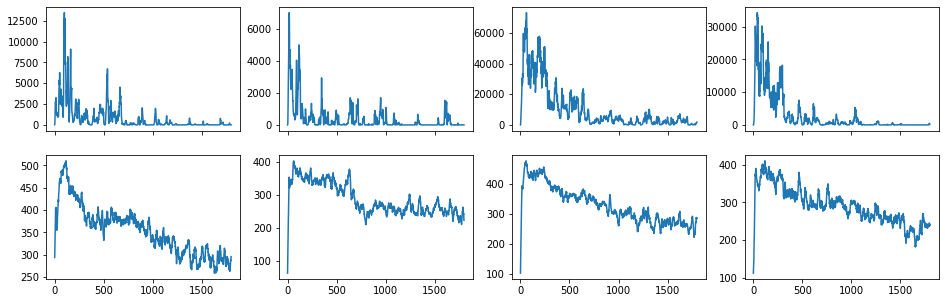

In [132]:
C_cols = [col for col in df_IGT.columns if col[0] == 'C']
M_cols = [col for col in df_IGT.columns if col[0] == 'M']
Z_cols = [col for col in df_IGT.columns if col[0] == 'Z']
fig_copp,ax_copp = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(C_cols[:-1]): 
    ax_copp[0,a].plot(df_IGT[i])
    ax_copp[1,a].plot(df_mean[i])

Zinc representation

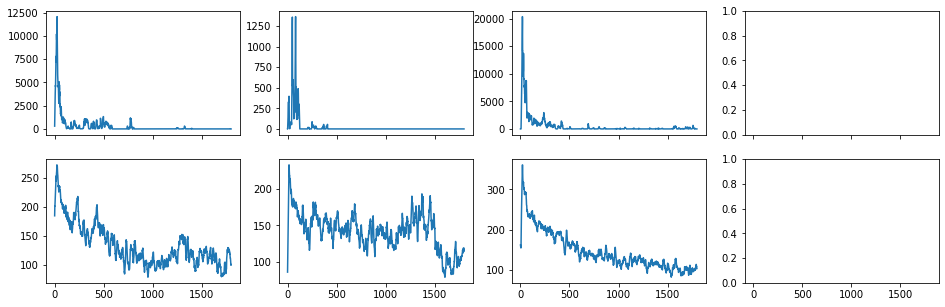

In [133]:
fig_zinc,ax_zinc = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(Z_cols): 
    ax_zinc[0,a].plot(df_IGT[i])
    ax_zinc[1,a].plot(df_mean[i])

Methomyl representation

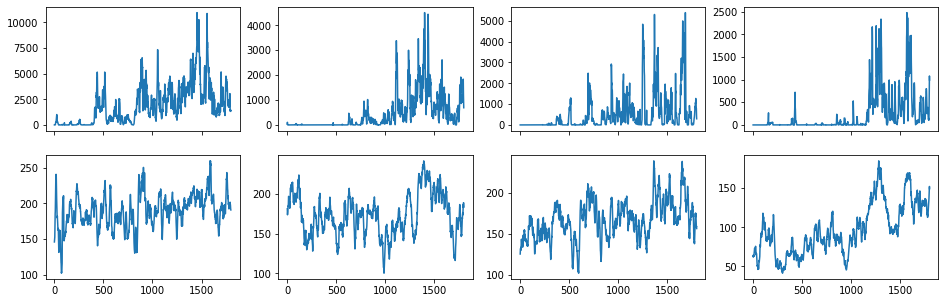

In [134]:
fig_meth,ax_meth = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(M_cols): 
    ax_meth[0,a].plot(df_IGT[i])
    ax_meth[1,a].plot(df_mean[i])

Gammarus data normalisation - from individual values what is the 95% non zero IGT and mean value?

Kernal Smoothing of all data

In [135]:
import skfda
from skfda.misc.hat_matrix import (
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.representation.grid import FDataGrid

In [136]:
#convert IGTs to fdatagrid
IGT_data_matrix = [np.around(np.array(df_IGT[col],dtype = np.float64),decimals = 3) for col in df_IGT.columns]
IGT_grid_points = [i for i in range(df_IGT.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTdata',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )
IGT_fd 

FDataGrid(
    array([[[1.789800e+01],
            [2.758900e+01],
            [2.216140e+02],
            ...,
            [5.000000e-03],
            [5.000000e-03],
            [5.000000e-03]],
    
           [[0.000000e+00],
            [9.938000e+00],
            [5.061500e+01],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[2.030500e+01],
            [1.673970e+02],
            [8.816790e+02],
            ...,
            [1.849614e+03],
            [1.849614e+03],
            [1.849614e+03]],
    
           ...,
    
           [[2.980360e+02],
            [7.966820e+02],
            [1.418404e+03],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[0.000000e+00],
            [1.114000e+00],
            [3.086900e+01],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[

In [137]:
means_data_matrix = [np.around(np.array(df_mean[col],dtype = np.float64),decimals = 3) for col in df_mean.columns]
means_grid_points = [i for i in range(df_mean.shape[0])]
means_fd = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

In [138]:
#FDA categories

y_map = {'C':'Cu','M':'Me','Z':'Zi'}
y_IGT,y_mean = [y_map[c[0]] for c in df_IGT.columns],[y_map[c[0]] for c in df_mean.columns]
y_IGT

['Cu', 'Cu', 'Cu', 'Cu', 'Cu', 'Me', 'Me', 'Me', 'Me', 'Zi', 'Zi', 'Zi']

In [139]:
#IGT smoothing
IGT_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(IGT_fd)

#means smoothing
means_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd)

In [140]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
)

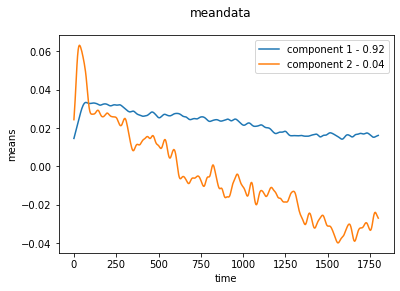

In [141]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

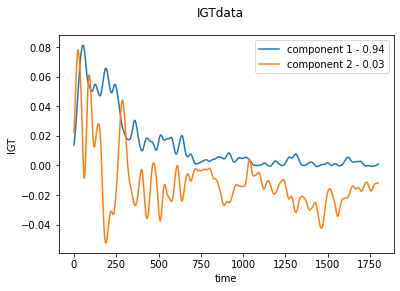

In [142]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(IGT_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

In [143]:
import seaborn as sns

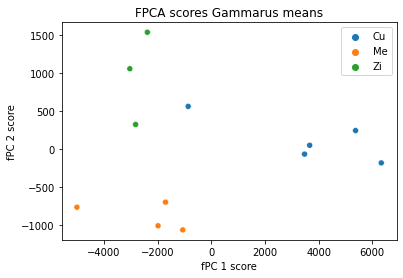

In [144]:
scores = fpca_discretized.fit_transform(means_fd_smooth)

fig_meanFPCA,ax_meanFPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT,ax = ax_meanFPCA)
ax_meanFPCA.set_xlabel("fPC 1 score")
ax_meanFPCA.set_ylabel("fPC 2 score")
ax_meanFPCA.set_title("FPCA scores Gammarus means")
plt.show()

Try this with non squared and perhaps log axis

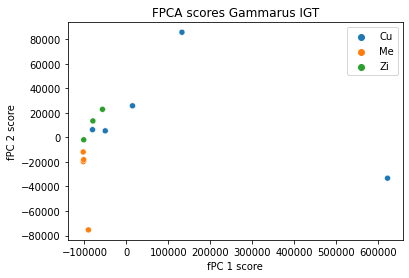

In [145]:
scores = fpca_discretized.fit_transform(IGT_fd_smooth)

fig_IGTFPCA,ax_IGTFPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT,ax = ax_IGTFPCA)
ax_IGTFPCA.set_xlabel("fPC 1 score")
ax_IGTFPCA.set_ylabel("fPC 2 score")
ax_IGTFPCA.set_title("FPCA scores Gammarus IGT")
plt.show()

Unsupervised clustering for Gammarus of the curves

In [146]:
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot
)
from skfda.ml.clustering import FuzzyCMeans,KMeans

In [147]:
#Clustering unsupervised (except no. clusters)
n_clusters = 3
seed = 0

kmeans = KMeans(n_clusters = n_clusters, random_state = seed)
kmeans.fit(means_fd_smooth)
print(kmeans.predict(means_fd_smooth))

[2 2 2 2 1 0 0 0 0 1 1 1]


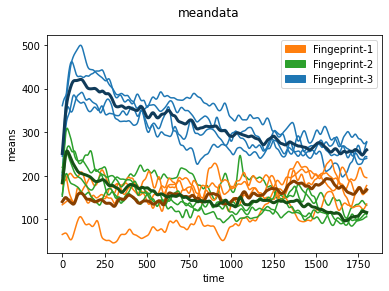

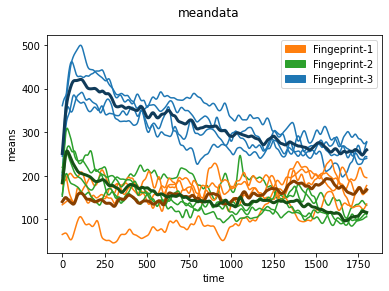

In [148]:
colormap = plt.cm.get_cmap('tab10')
cluster_colors = colormap([1,2,0])
labs = ['Fingeprint-{}'.format(i) for i in range(1,4)]

ClusterPlot(kmeans,means_fd_smooth,cluster_colors = cluster_colors,cluster_labels = labs).plot()

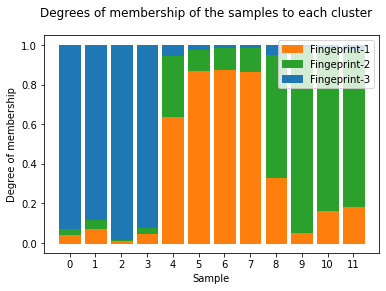

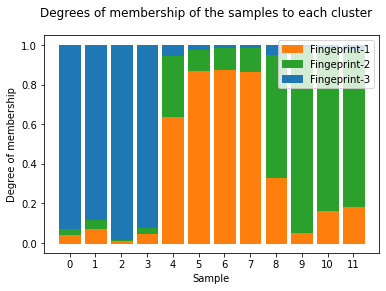

In [149]:
fuzzy_kmeans = FuzzyCMeans(n_clusters = n_clusters,random_state = seed)
fuzzy_kmeans.fit(means_fd_smooth)
ClusterMembershipPlot(fuzzy_kmeans,means_fd_smooth,cluster_colors=cluster_colors,
                     cluster_labels=labs).plot()

## Erpobdella

In [150]:
#Begin with standard entries
e_entries = ['C{}'.format(etudes['C'][70]),'C{}'.format(etudes['C'][107]),'C{}'.format(etudes['C'][109]),'C{}'.format(etudes['C'][142]),'C{}'.format(etudes['C'][143]),
            'M{}'.format(etudes['M'][165]),'M{}'.format(etudes['M'][166]),'M{}'.format(etudes['M'][209]),'M{}'.format(etudes['M'][210]),
            'Z{}'.format(etudes['Z'][121]),'Z{}'.format(etudes['Z'][131]),'Z{}'.format(etudes['Z'][159])]

df_IGT,df_mean = dfs_IGT['E'][e_entries],dfs_mean['E'][e_entries]
df_IGT.head()

,C0,C1,C2,C10,C11,M0,M1,M2,M3,Z0,Z4,Z6
0,0.0,0.0,119.117579,0.0,0.0,0.0,4688.455867,5.292454,824.910202,0.0,8.41087,866.663553
1,0.0,0.0,119.117579,0.0,0.0,0.0,5209.447152,5.292454,910.053922,0.0,8.41087,766.390014
2,0.0,0.0,119.117579,0.0,0.0,0.0,5726.062406,0.070464,991.635845,0.0,0.048554,651.900897
3,0.0,0.0,119.117579,0.0,0.0,0.0,6197.88542,0.070464,1202.206527,0.0,0.048554,417.581051
4,0.0,0.0,119.117579,0.0,0.0,0.0,6043.072264,0.070464,1441.9905,0.0,0.048554,546.912012


In [151]:
#convert IGTs to fdatagrid
IGT_data_matrix = [np.around(np.array(df_IGT[col],dtype = np.float64),decimals = 3) for col in df_IGT.columns]
IGT_grid_points = [i for i in range(df_IGT.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTdata',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )

means_data_matrix = [np.around(np.array(df_mean[col],dtype = np.float64),decimals = 3) for col in df_mean.columns]
means_grid_points = [i for i in range(df_mean.shape[0])]
means_fd = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

In [152]:
#IGT smoothing
IGT_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(IGT_fd)

#means smoothing
means_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd)

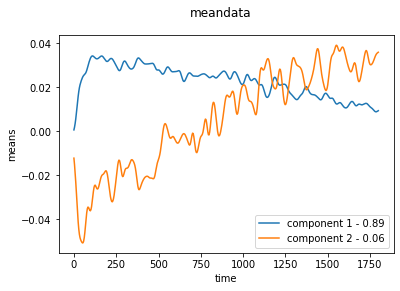

In [153]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

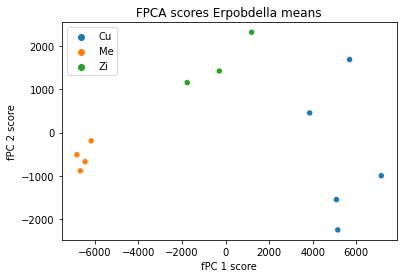

In [154]:
scores = fpca_discretized.fit_transform(means_fd_smooth)

fig_meanFPCA,ax_meanFPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT,ax = ax_meanFPCA)
ax_meanFPCA.set_xlabel("fPC 1 score")
ax_meanFPCA.set_ylabel("fPC 2 score")
ax_meanFPCA.set_title("FPCA scores Erpobdella means")
plt.show()

## Radix

In [155]:
#Begin with standard entries
r_entries = ['C{}'.format(etudes['C'][70]),'C{}'.format(etudes['C'][107]),'C{}'.format(etudes['C'][109]),'C{}'.format(etudes['C'][142]),'C{}'.format(etudes['C'][143]),
            'M{}'.format(etudes['M'][165]),'M{}'.format(etudes['M'][166]),'M{}'.format(etudes['M'][209]),'M{}'.format(etudes['M'][210]),
            'Z{}'.format(etudes['Z'][121]),'Z{}'.format(etudes['Z'][131]),'Z{}'.format(etudes['Z'][159])]

df_IGT,df_mean = dfs_IGT['R'][e_entries],dfs_mean['R'][e_entries]
df_IGT.head()

,C0,C1,C2,C10,C11,M0,M1,M2,M3,Z0,Z4,Z6
0,0.0,24.962514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,18.127584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,18.127584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,47.19461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,93.775337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
#convert IGTs to fdatagrid
IGT_data_matrix = [np.around(np.array(df_IGT[col],dtype = np.float64),decimals = 3) for col in df_IGT.columns]
IGT_grid_points = [i for i in range(df_IGT.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTdata',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )

means_data_matrix = [np.around(np.array(df_mean[col],dtype = np.float64),decimals = 3) for col in df_mean.columns]
means_grid_points = [i for i in range(df_mean.shape[0])]
means_fd = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

In [157]:
#IGT smoothing
IGT_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(IGT_fd)

#means smoothing
means_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd)

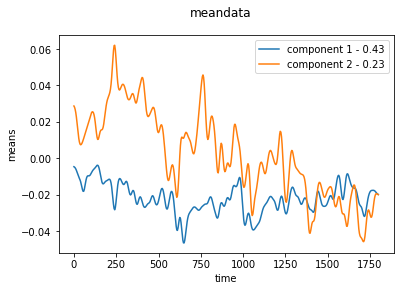

In [158]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

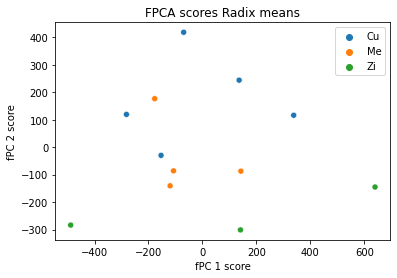

In [159]:
scores = fpca_discretized.fit_transform(means_fd_smooth)

fig_meanFPCA,ax_meanFPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT,ax = ax_meanFPCA)
ax_meanFPCA.set_xlabel("fPC 1 score")
ax_meanFPCA.set_ylabel("fPC 2 score")
ax_meanFPCA.set_title("FPCA scores Radix means")
plt.show()

# Multidimensional Clusters

Attempt with means

Approach - histogram for each species of IGT values (raw,sqrt,log)
Normalisation (wrt variance as well?)

Filter (hanning window?)

Concatenation and FPCA / Kmeans clustering

Outliers?

<AxesSubplot: ylabel='Count'>

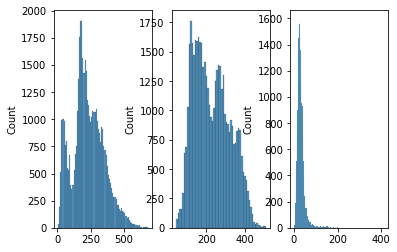

In [160]:
[IGT_E,IGT_G,IGT_R] = [np.array(dfs_IGT[s]).flatten() for s in [*specie]]
[mean_E,mean_G,mean_R] = [np.array(dfs_mean[s]).flatten() for s in [*specie]]

fig_hist_m,ax_hist_m = plt.subplots(1,3)
sns.histplot(mean_E,ax = ax_hist_m[0])
sns.histplot(mean_G,ax = ax_hist_m[1])
sns.histplot(mean_R,ax = ax_hist_m[2])

In [197]:
outliers = {'E':750,'G':600,'R':120}

Notice that the spike in low values for Erpobdella is due to the methomyl drop in reaction, otherwise all seem like left weighted gaussian distributions

Here attempt standardisation using normal distribution assumption

In [198]:
mean_total = {'E':np.mean(mean_E),'G':np.mean(mean_G),'R':np.mean(mean_R)}
std_total = {'E':np.std(mean_E),'G':np.std(mean_G),'R':np.std(mean_R)}
dfs_mean__ = {'E':None,'G':None,'R':None}
dfs_IGT__ = {'E':None,'G':None,'R':None}

print('Means ',mean_total)
print('Std   ',std_total)

Means  {'E': 229.8720845613448, 'G': 228.0294007910439, 'R': 31.912956439280613}
Std    {'E': 116.84375552407832, 'G': 93.38343397998659, 'R': 19.958446404578776}


In [199]:
for s in dfs_mean:
    df = dfs_mean[s].copy()
    df[df > outliers[s]] = mean_total[s]
    dfs_mean__[s] = (df - mean_total[s]) / std_total[s]

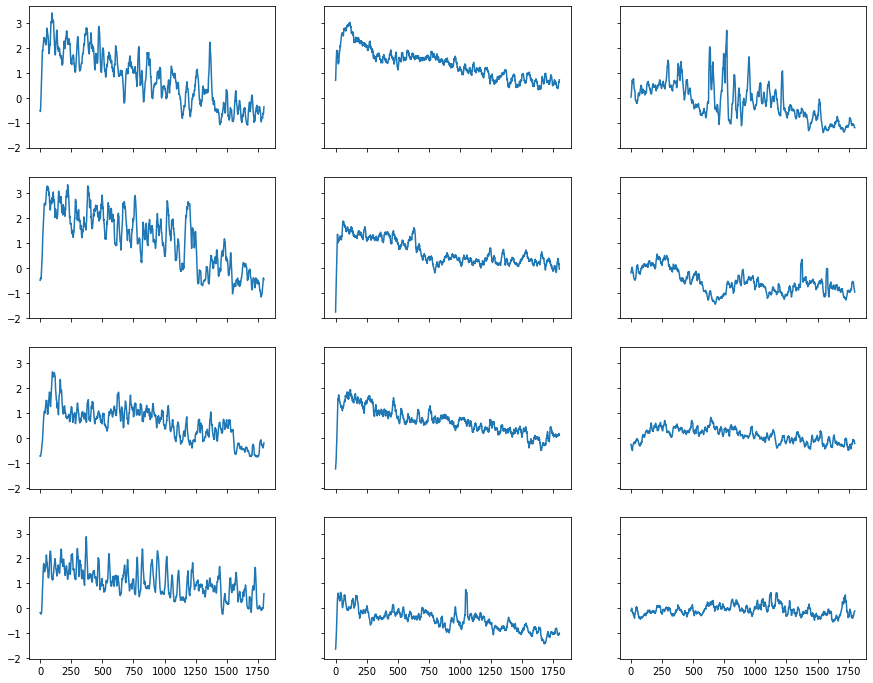

In [203]:
#plot data Copper
fig__,ax__ = plt.subplots(4,3,sharex = True,sharey = True,figsize = (15,12))
for i in range(4):
    for x,s in enumerate(specie):
        ax__[i,x].plot(dfs_mean__[s][dfs_mean__[s].columns[i]])

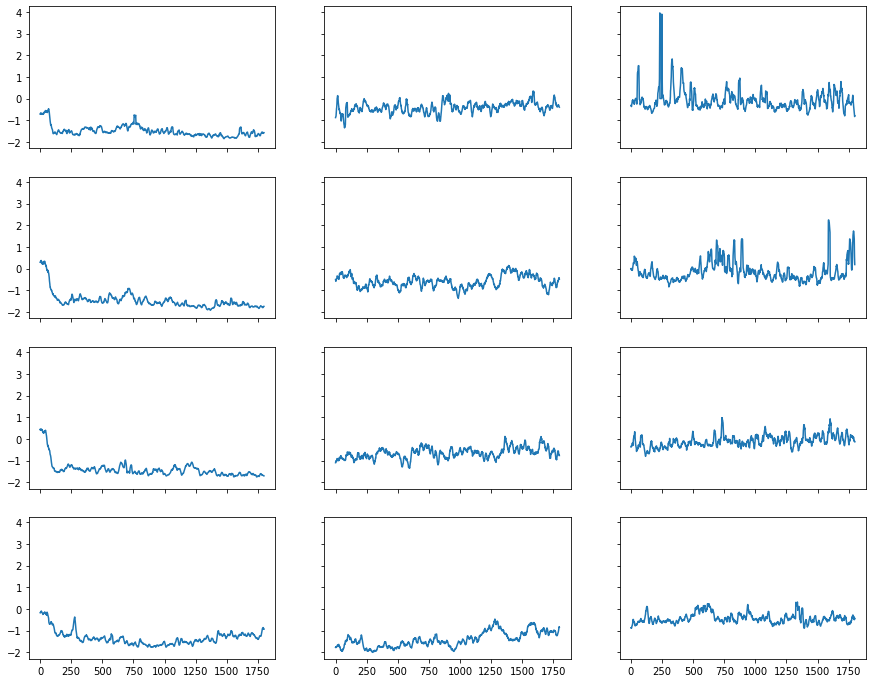

In [204]:
#plot data Methomyl
fig__,ax__ = plt.subplots(4,3,sharex = True,sharey = True,figsize = (15,12))
for i in range(15,19):
    for x,s in enumerate(specie):
        ax__[i-15,x].plot(dfs_mean__[s][dfs_mean__[s].columns[i]])

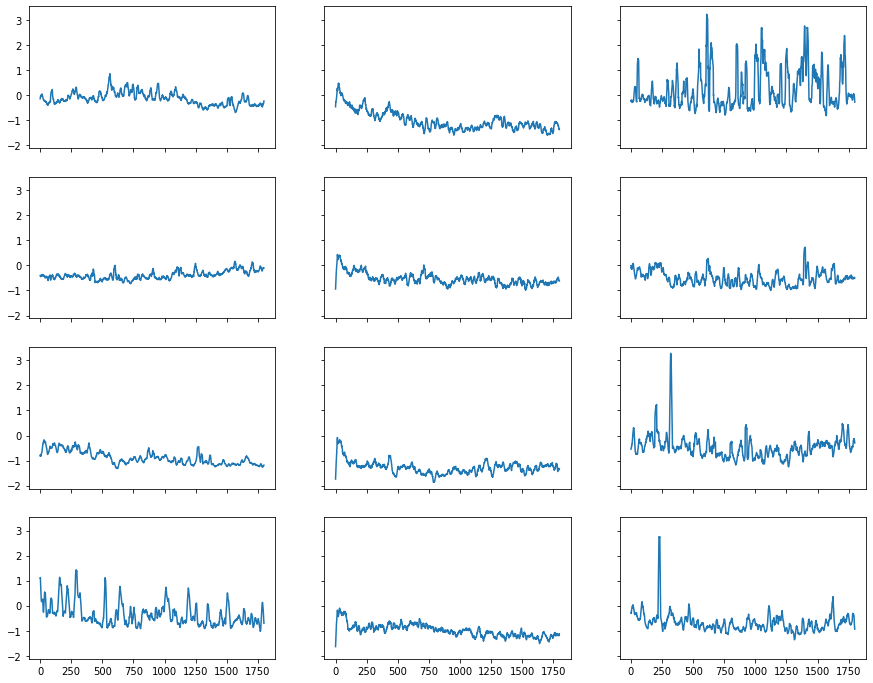

In [205]:
#plot data Zinc
fig__,ax__ = plt.subplots(4,3,sharex = True,sharey = True,figsize = (15,12))
for i in range(19,23):
    for x,s in enumerate(specie):
        ax__[i-19,x].plot(dfs_mean__[s][dfs_mean__[s].columns[i]])

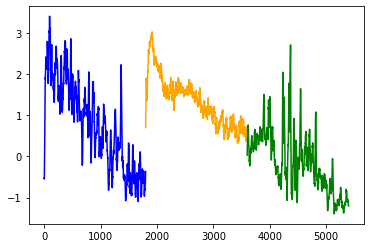

In [216]:
#concatenate data example
testE = np.array(dfs_mean__['E'][dfs_mean__['E'].columns[0]])
testG = np.array(dfs_mean__['G'][dfs_mean__['E'].columns[0]])
testR = np.array(dfs_mean__['R'][dfs_mean__['E'].columns[0]])

plt.figure()
plt.plot(np.arange(len(testE)),testE,color = 'blue')
plt.plot(np.arange(len(testE),2*len(testE)),testG,color = 'orange')
plt.plot(np.arange(2*len(testE),3*len(testE)),testR,color = 'green')

## Concatenation

There are sharp gradients, meaning over smoothing at the join will remove key features.

Attemp to smooth with sigma function with small bandwidth

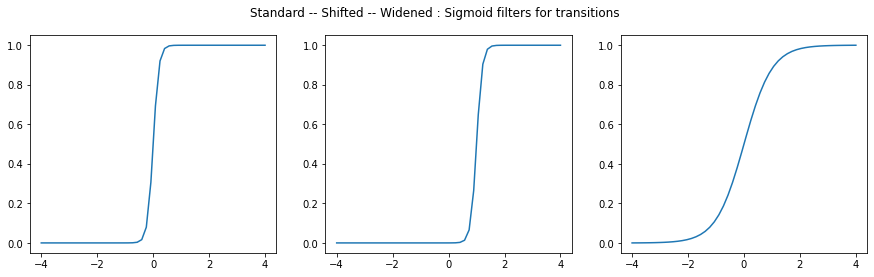

In [217]:
#Sigmoid
x = np.linspace(-4,4)
y1 = 1.0 / (1 + np.exp(-x / 0.1))
y2 = 1.0 / (1 + np.exp(-(x - 1) / 0.1))
y3 = 1.0 / (1 + np.exp(-x / 0.5))
y = [y1,y2,y3]

fig_sig,ax_sig = plt.subplots(1,3,figsize = (15,4))
fig_sig.suptitle('Standard -- Shifted -- Widened : Sigmoid filters for transitions')
for i in range(3):
    ax_sig[i].plot(x,y[i])

### Concatenation on temp version

(1700.0, 1900.0)

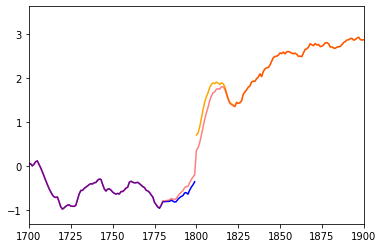

In [230]:
def sigmoid_filter(y1,y2,breakpoint,bandwidth):
    x = np.arange(len(y1))
    sigma = 1.0 / (1 + np.exp(-(x - breakpoint) / bandwidth))
    f = (1-sigma) * y1 + sigma * y2
    return f

#initially test very narrow bandwidth
y1,y2 = np.zeros(2*len(testE)),np.zeros(2*len(testG))
y1[:len(testE)] = testE
y2[len(testG):] = testG
smoothed_test = sigmoid_filter(y1,y2,len(testE),5)

plt.figure()
plt.plot(np.arange(len(testE)),testE,color = 'blue')
plt.plot(np.arange(len(testE),2*len(testE)),testG,color = 'orange')
plt.plot(smoothed_test,color = 'red',alpha = 0.5)
plt.xlim(1700,1900)

C:\Users\George\AppData\Local\Temp\ipykernel_7756\2373528977.py:3: RuntimeWarning: overflow encountered in exp
  sigma = 1.0 / (1 + np.exp(-(x - breakpoint) / bandwidth))


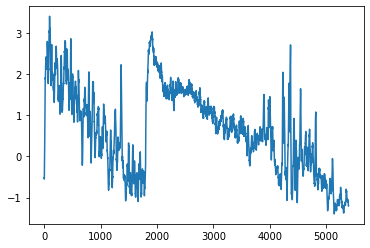

In [233]:
def smooth_means(means):
    """
    Assumed means = {'E':np.mean(E),'G':np.mean(G),'R':np.mean(R)}
    """
    y1,y2 = np.zeros(len(means['E']) + len(means['G'])),np.zeros(len(means['E']) + len(means['G']))
    y1[:len(means['E'])] = means['E']
    y2[len(means['E']):] = means['G']
    y_concat = sigmoid_filter(y1,y2,len(means['E']),5)
    
    y1,y2 = np.zeros(len(y_concat) + len(means['R'])),np.zeros(len(y_concat) + len(means['R']))
    y1[:len(y_concat)] = y_concat
    y2[len(y_concat):] = means['R']
    y_concat = sigmoid_filter(y1,y2,len(y_concat),5)
    
    return y_concat

smoothed_c0 = smooth_means({'E':testE,'G':testG,'R':testR})
plt.figure()
plt.plot(smoothed_c0)

Concatenate all series in dataframe, make them functional, plot functional versions

In [238]:
df_mean_concat = pd.DataFrame(columns = dfs_mean__['E'].columns,index = np.arange(3*dfs_mean__['E'].shape[0]))
for col in df_mean_concat.columns:
    df_mean_concat[col] = smooth_means({
        'E':dfs_mean__['E'][col],
        'G':dfs_mean__['G'][col],
        'R':dfs_mean__['R'][col],
    })
    
df_mean_concat

C:\Users\George\AppData\Local\Temp\ipykernel_7756\2373528977.py:3: RuntimeWarning: overflow encountered in exp
  sigma = 1.0 / (1 + np.exp(-(x - breakpoint) / bandwidth))


,C0,C1,C10,C11,C12,C13,C14,C2,C3,C4,...,M1,M2,M3,Z0,Z1,Z2,Z3,Z4,Z5,Z6
0,-0.521731,-0.497138,-0.712079,-0.178215,-0.154745,-0.343672,-0.432293,-0.028296,-0.915835,-0.898234,...,0.296883,0.427490,-0.168678,-0.141984,-0.411443,-0.807635,1.108160,-0.327752,-0.322856,-0.071310
1,-0.529463,-0.447327,-0.705399,-0.190463,-0.157645,-0.329644,-0.433332,-0.008724,-0.928765,-0.894658,...,0.307422,0.425532,-0.156293,-0.101981,-0.427745,-0.780568,1.121128,-0.282185,-0.306109,-0.075813
2,-0.549775,-0.430664,-0.722308,-0.197379,-0.159177,-0.312162,-0.428110,0.001153,-0.934274,-0.904876,...,0.335275,0.446277,-0.157874,-0.073169,-0.425131,-0.765443,1.096681,-0.288110,-0.293556,-0.103327
3,-0.519197,-0.408102,-0.701617,-0.205170,-0.163444,-0.308774,-0.415251,0.027213,-0.934261,-0.875247,...,0.338167,0.414594,-0.159702,-0.051073,-0.428366,-0.787214,0.952030,-0.281441,-0.299008,-0.121444
4,-0.412601,-0.413388,-0.695850,-0.206132,-0.169542,-0.316826,-0.404337,0.061677,-0.925832,-0.850251,...,0.335867,0.398436,-0.158129,-0.041049,-0.447861,-0.821139,0.782278,-0.257023,-0.285954,-0.116812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,-1.163923,-0.858007,-0.136941,-0.129470,2.060591,0.795839,-0.735774,-1.011929,-0.893624,1.219247,...,1.366943,-0.080366,-0.492081,0.003790,-0.483699,-0.183605,-0.660093,-0.871215,3.475704,-1.055227
5396,-1.191276,-0.889441,-0.187613,-0.119700,1.104773,0.796288,-0.787453,-1.035548,-0.900871,1.118418,...,0.785852,-0.091024,-0.487643,-0.052486,-0.490802,-0.191305,-0.744054,-0.901438,3.208446,-1.053825
5397,-1.194820,-0.930467,-0.194271,-0.115554,0.997793,0.659886,-0.806531,-1.042723,-0.884730,1.573891,...,0.560165,-0.104995,-0.438485,-0.133066,-0.496623,-0.200589,-0.797580,-0.908760,2.545604,-1.034477
5398,-1.193010,-0.950188,-0.190919,-0.107190,1.820438,0.734583,-0.757888,-1.044020,-0.916328,1.973837,...,0.357559,-0.138863,-0.413508,-0.183713,-0.507168,-0.259922,-0.859370,-0.927426,2.036345,-0.996968


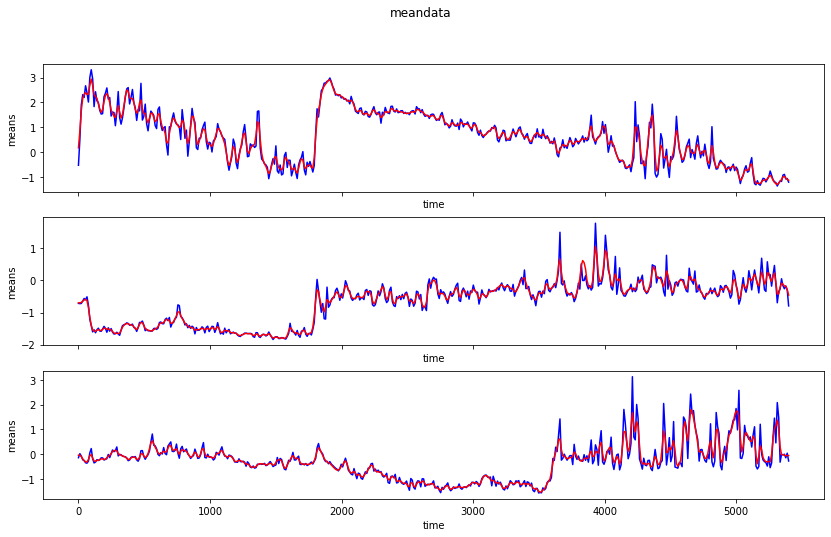

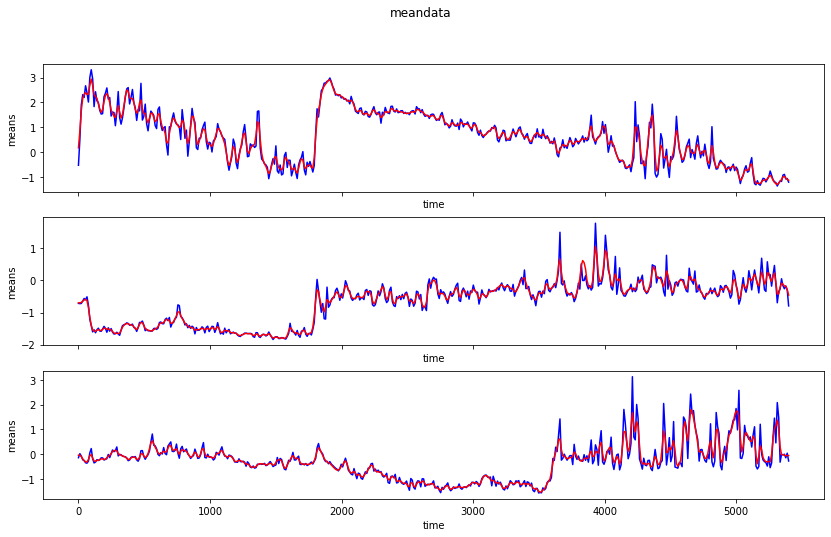

In [242]:
df_mean_concat = df_mean_concat[g_entries]

#means data
means_data_matrix = [np.around(np.array(df_mean_concat[col],dtype = np.float64),decimals = 3) for col in df_mean_concat.columns]
means_grid_points = [i for i in range(df_mean_concat.shape[0])]
means_fd_cc = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

#means smoothing
means_fd_cc_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd_concat)

#show smoothed plots
fig_concat,ax_concat = plt.subplots(3,1,figsize = (14,8),sharex = True)
means_fd_cc[0].plot(ax_concat[0],color = 'blue')
means_fd_cc_smooth[0].plot(ax_concat[0],color = 'red')

means_fd_cc[5].plot(ax_concat[1],color = 'blue')
means_fd_cc_smooth[5].plot(ax_concat[1],color = 'red')

means_fd_cc[9].plot(ax_concat[2],color = 'blue')
means_fd_cc_smooth[9].plot(ax_concat[2],color = 'red')

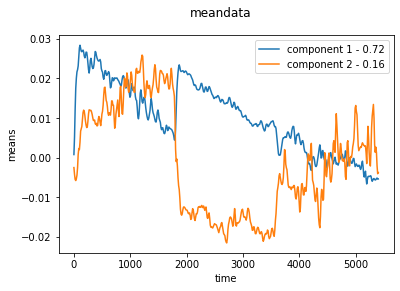

In [243]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_cc_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

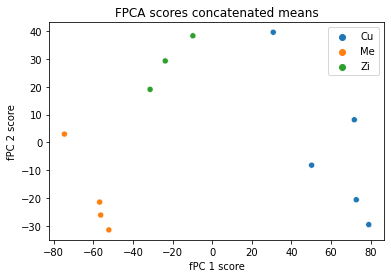

In [244]:
scores = fpca_discretized.fit_transform(means_fd_cc_smooth)

fig_meanFPCA,ax_meanFPCA = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT,ax = ax_meanFPCA)
ax_meanFPCA.set_xlabel("fPC 1 score")
ax_meanFPCA.set_ylabel("fPC 2 score")
ax_meanFPCA.set_title("FPCA scores concatenated means")
plt.show()

## Clustering example

In [246]:
#Clustering unsupervised (except no. clusters)
n_clusters = 3
seed = 0

kmeans = KMeans(n_clusters = n_clusters, random_state = seed)
kmeans.fit(means_fd_cc_smooth)
kmeans.predict(means_fd_smooth)

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1])

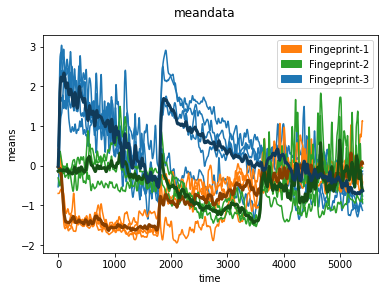

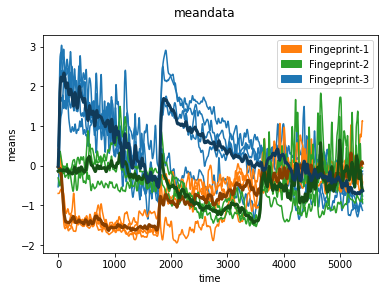

In [247]:
colormap = plt.cm.get_cmap('tab10')
cluster_colors = colormap([1,2,0])
labs = ['Fingeprint-{}'.format(i) for i in range(1,4)]

ClusterPlot(kmeans,means_fd_cc_smooth,cluster_colors = cluster_colors,cluster_labels = labs).plot()

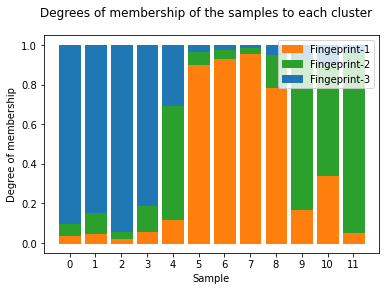

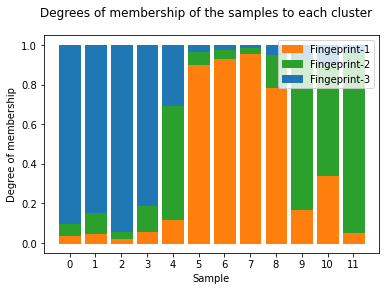

In [248]:
fuzzy_kmeans = FuzzyCMeans(n_clusters = n_clusters,random_state = seed)
fuzzy_kmeans.fit(means_fd_cc_smooth)
ClusterMembershipPlot(fuzzy_kmeans,means_fd_cc_smooth,cluster_colors=cluster_colors,
                     cluster_labels=labs).plot()